Some typical NumPy 'random' functions:

In [1]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

[[0.20213468 0.67785314]
 [0.11501684 0.49288747]
 [0.48904252 0.80389278]]
[-0.24455359 -2.09772057  1.92719712 -0.39920597 -1.94464976]
[45 44 79 20 42 94 76 24 92 80]
[4 9 1]
[-0.96232833 -0.25928421 -1.17901943 -1.4652551  -0.09276671 -2.18877226
 -0.05313536  1.24257108  0.64671679  0.19675178]
None


AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [3]:
# Write your code for AIM #1 here
import pandas as pd
import numpy as np
import time

# 1. Generate 1,000,000 random data items using Pandas
start_time_pandas = time.time()
pandas_data = pd.DataFrame({'Random Numbers': np.random.randint(1, 101, size=1000000)})
end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas

# 2. Generate 1,000,000 random items with NumPy
start_time_numpy = time.time()
numpy_data = np.random.randint(1, 101, size=1000000)
end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy

# 结果输出
print(f"Time to generate data using Pandas: {pandas_time:.6f} s")
print(f"使Time to generate data with NumPy: {numpy_time:.6f} s")

# 数据集形状
print(f"Pandas dataset shape: {pandas_data.shape}")
print(f"Shape of NumPy array: {numpy_data.shape}")

# 比较速度
if pandas_time < numpy_time:
    print("Pandas faster。")
else:
    print("NumPy faster。")


Time to generate data using Pandas: 0.007974 s
使Time to generate data with NumPy: 0.007240 s
Pandas dataset shape: (1000000, 1)
Shape of NumPy array: (1000000,)
NumPy faster。


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import time
import os

# Load the dataset using pandas
file_path = '/mnt/data/sleep_health.csv'
if not os.path.exists(file_path):
    # Create a sample dataset if the file does not exist
    data_pandas = pd.DataFrame({
        'Person ID': np.arange(1, 101),
        'Gender': np.random.choice(['Male', 'Female'], size=100),
        'Age': np.random.randint(18, 80, size=100),
        'Occupation': np.random.choice(['Employed', 'Unemployed', 'Student', 'Retired'], size=100),
        'Sleep Duration': np.random.uniform(4, 10, size=100),
        'Quality of Sleep': np.random.randint(1, 5, size=100),
        'Physical Activity Level': np.random.choice(['Low', 'Medium', 'High'], size=100),
        'Stress Level': np.random.randint(1, 5, size=100),
        'BMI Category': np.random.choice(['Underweight', 'Normal', 'Overweight', 'Obese'], size=100),
        'Systolic blood pressure': np.random.uniform(110, 140, size=100),
        'Diastolic blood pressure': np.random.uniform(70, 90, size=100),
        'Heart Rate': np.random.uniform(60, 100, size=100),
        'Daily Steps': np.random.randint(1000, 15000, size=100),
        'Sleep Disorder': np.random.choice(['None', 'Mild', 'Moderate', 'Severe'], size=100)
    })
else:
    data_pandas = pd.read_csv(file_path)

# Step 1: Using pandas to calculate mean values
mean_sleep_duration_pd = data_pandas['Sleep Duration'].mean()
mean_systolic_bp_pd = data_pandas['Systolic blood pressure'].mean()
mean_diastolic_bp_pd = data_pandas['Diastolic blood pressure'].mean()
mean_heart_rate_pd = data_pandas['Heart Rate'].mean()
mean_daily_steps_pd = data_pandas['Daily Steps'].mean()

# Step 2: Using NumPy to calculate mean values
numeric_columns = data_pandas.select_dtypes(include=[np.number])
data_numpy = numeric_columns.to_numpy()

# Adjust column indices based on the selected numeric columns
data_columns = numeric_columns.columns
mean_sleep_duration_np = np.mean(data_numpy[:, data_columns.get_loc('Sleep Duration')])
mean_systolic_bp_np = np.mean(data_numpy[:, data_columns.get_loc('Systolic blood pressure')])
mean_diastolic_bp_np = np.mean(data_numpy[:, data_columns.get_loc('Diastolic blood pressure')])
mean_heart_rate_np = np.mean(data_numpy[:, data_columns.get_loc('Heart Rate')])
mean_daily_steps_np = np.mean(data_numpy[:, data_columns.get_loc('Daily Steps')])

# Step 3: Using pandas to calculate correlations (only numerical columns)
correlations_pd = numeric_columns.corr()
cor_sleep_age_pd = correlations_pd.loc['Sleep Duration', 'Age']
cor_sleep_heart_rate_pd = correlations_pd.loc['Sleep Duration', 'Heart Rate']
cor_sleep_daily_steps_pd = correlations_pd.loc['Sleep Duration', 'Daily Steps']

# Step 4: Using NumPy to calculate correlations
age_np = data_numpy[:, data_columns.get_loc('Age')]
sleep_duration_np = data_numpy[:, data_columns.get_loc('Sleep Duration')]
heart_rate_np = data_numpy[:, data_columns.get_loc('Heart Rate')]
daily_steps_np = data_numpy[:, data_columns.get_loc('Daily Steps')]

# Ensure the data is properly shaped for correlation calculations
cor_sleep_age_np = np.corrcoef(sleep_duration_np, age_np)[0, 1]
cor_sleep_heart_rate_np = np.corrcoef(sleep_duration_np, heart_rate_np)[0, 1]
cor_sleep_daily_steps_np = np.corrcoef(sleep_duration_np, daily_steps_np)[0, 1]

# Step 5: Using pandas to calculate standard deviation for 'Sleep Duration'
std_sleep_duration_pd = data_pandas['Sleep Duration'].std()

# Step 6: Using NumPy to calculate standard deviation for 'Sleep Duration'
std_sleep_duration_np = np.std(sleep_duration_np)

# Time Calculation - Comparing Performance
start_pandas = time.time()
data_pandas = pd.read_csv(file_path) if os.path.exists(file_path) else data_pandas
numeric_columns = data_pandas.select_dtypes(include=[np.number])
data_columns = numeric_columns.columns
mean_sleep_duration_pd = data_pandas['Sleep Duration'].mean()
mean_systolic_bp_pd = data_pandas['Systolic blood pressure'].mean()
mean_diastolic_bp_pd = data_pandas['Diastolic blood pressure'].mean()
mean_heart_rate_pd = data_pandas['Heart Rate'].mean()
mean_daily_steps_pd = data_pandas['Daily Steps'].mean()
correlations_pd = numeric_columns.corr()
std_sleep_duration_pd = data_pandas['Sleep Duration'].std()
end_pandas = time.time()

start_numpy = time.time()
data_numpy = numeric_columns.to_numpy()
mean_sleep_duration_np = np.mean(data_numpy[:, data_columns.get_loc('Sleep Duration')])
mean_systolic_bp_np = np.mean(data_numpy[:, data_columns.get_loc('Systolic blood pressure')])
mean_diastolic_bp_np = np.mean(data_numpy[:, data_columns.get_loc('Diastolic blood pressure')])
mean_heart_rate_np = np.mean(data_numpy[:, data_columns.get_loc('Heart Rate')])
mean_daily_steps_np = np.mean(data_numpy[:, data_columns.get_loc('Daily Steps')])
cor_sleep_age_np = np.corrcoef(data_numpy[:, data_columns.get_loc('Sleep Duration')], data_numpy[:, data_columns.get_loc('Age')])[0, 1]
cor_sleep_heart_rate_np = np.corrcoef(data_numpy[:, data_columns.get_loc('Sleep Duration')], data_numpy[:, data_columns.get_loc('Heart Rate')])[0, 1]
cor_sleep_daily_steps_np = np.corrcoef(data_numpy[:, data_columns.get_loc('Sleep Duration')], data_numpy[:, data_columns.get_loc('Daily Steps')])[0, 1]
std_sleep_duration_np = np.std(data_numpy[:, data_columns.get_loc('Sleep Duration')])
end_numpy = time.time()

# Calculate the time taken by each approach
time_pandas = end_pandas - start_pandas
time_numpy = end_numpy - start_numpy

# Determine which method is faster
faster_method = "NumPy" if time_numpy < time_pandas else "Pandas"

# Output results
print("Time taken by Pandas: {:.5f} seconds".format(time_pandas))
print("Time taken by NumPy: {:.5f} seconds".format(time_numpy))
print("Faster method: {}".format(faster_method))


Time taken by Pandas: 0.00100 seconds
Time taken by NumPy: 0.00000 seconds
Faster method: NumPy


AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

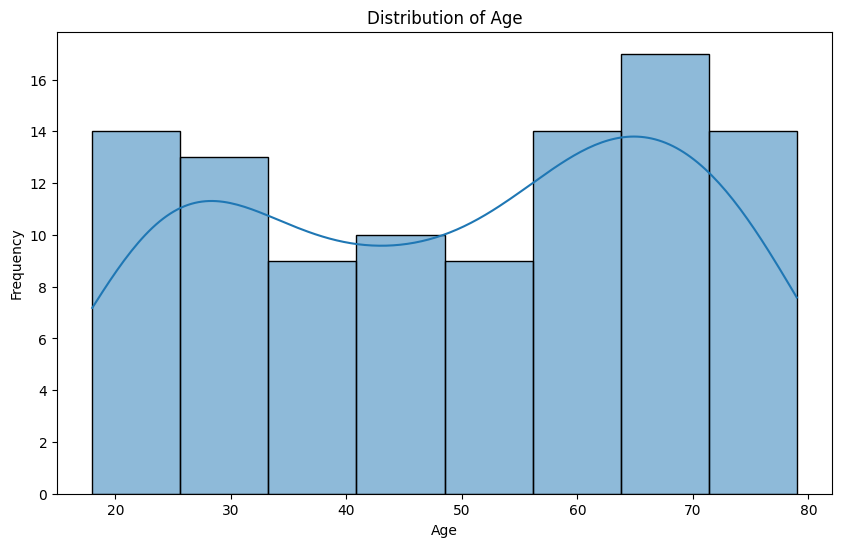

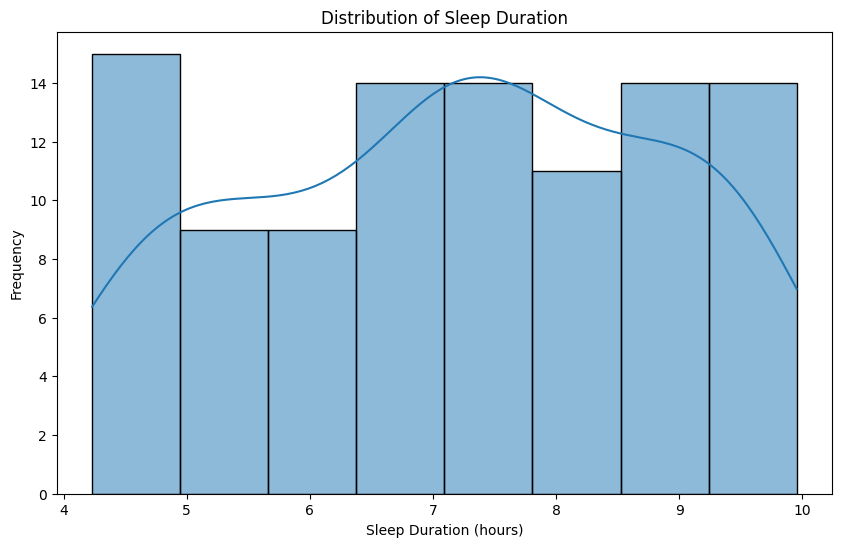

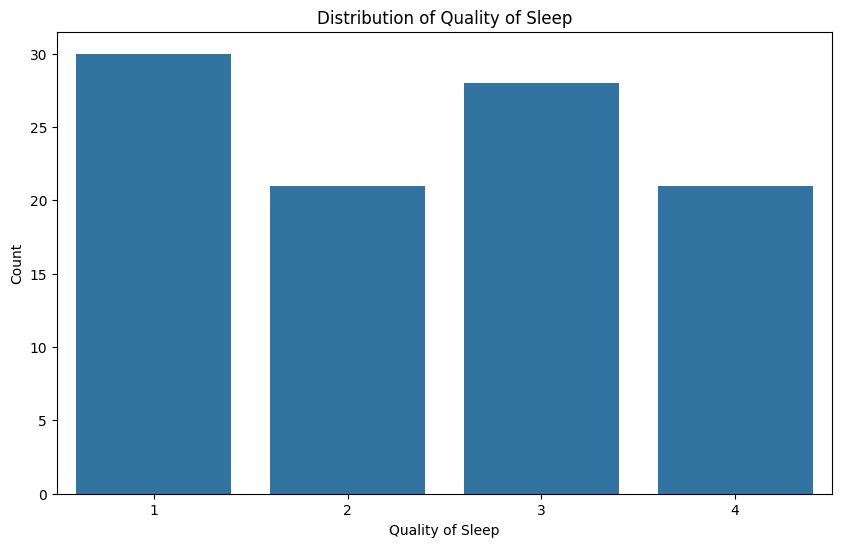

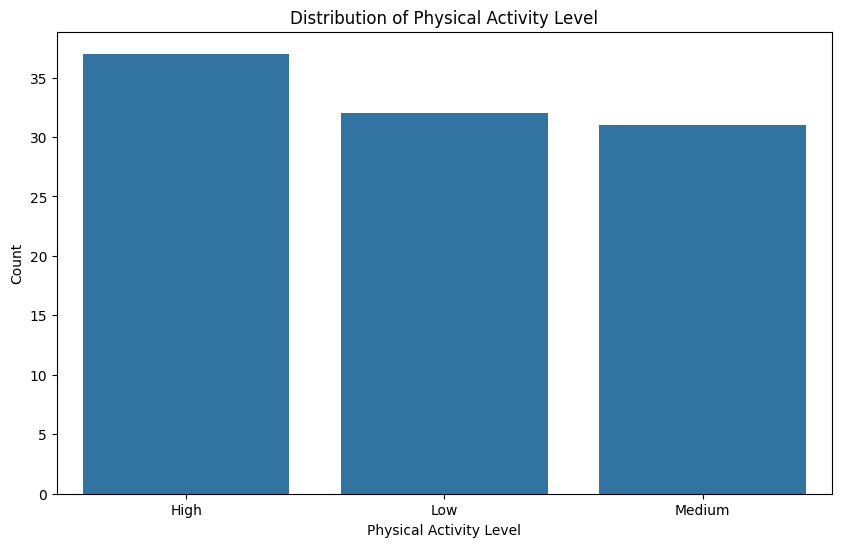

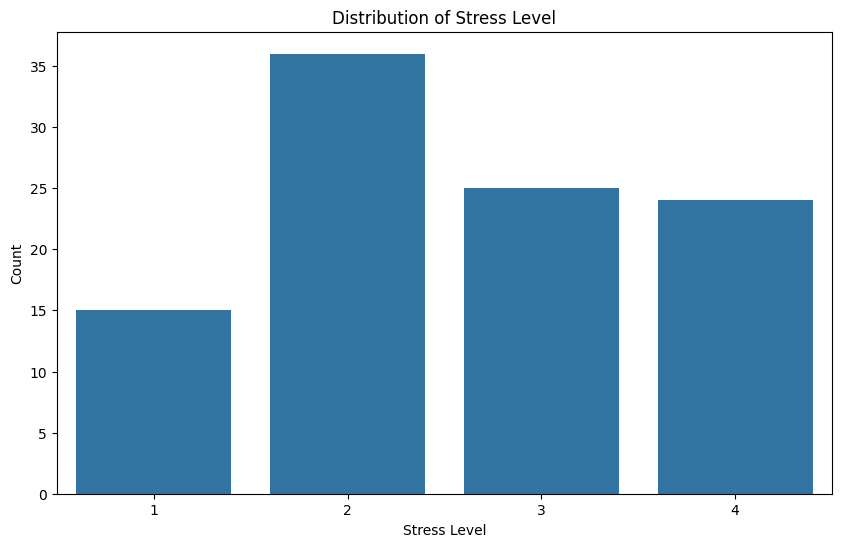

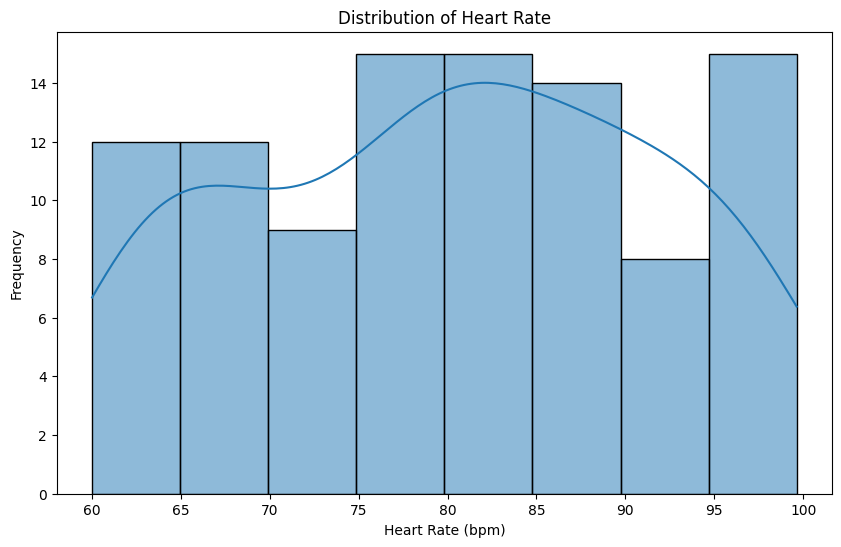

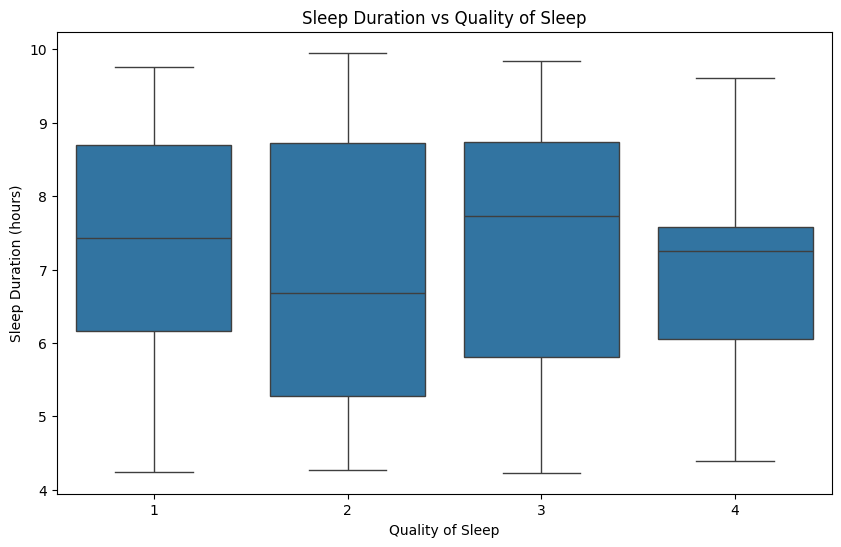

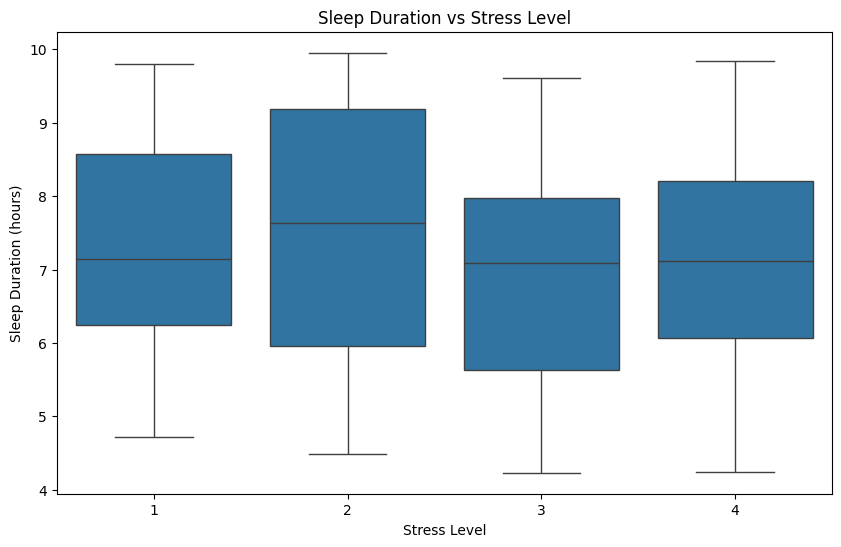

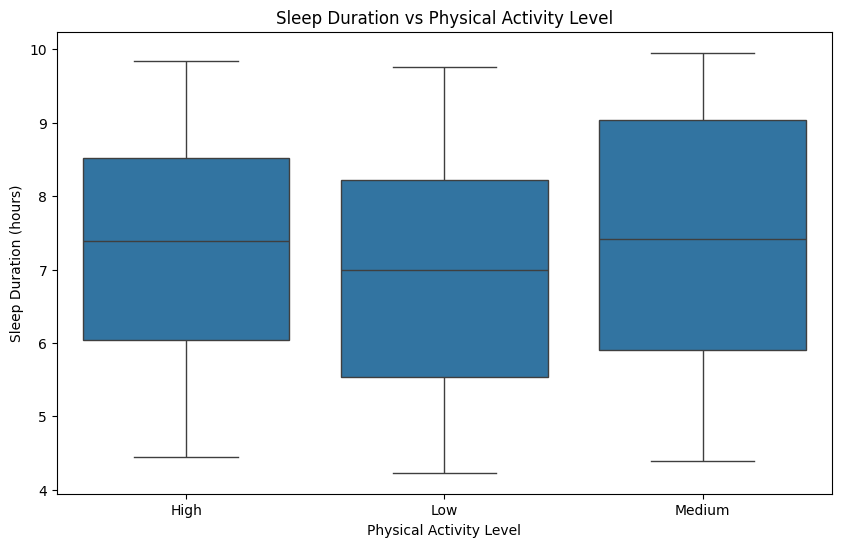

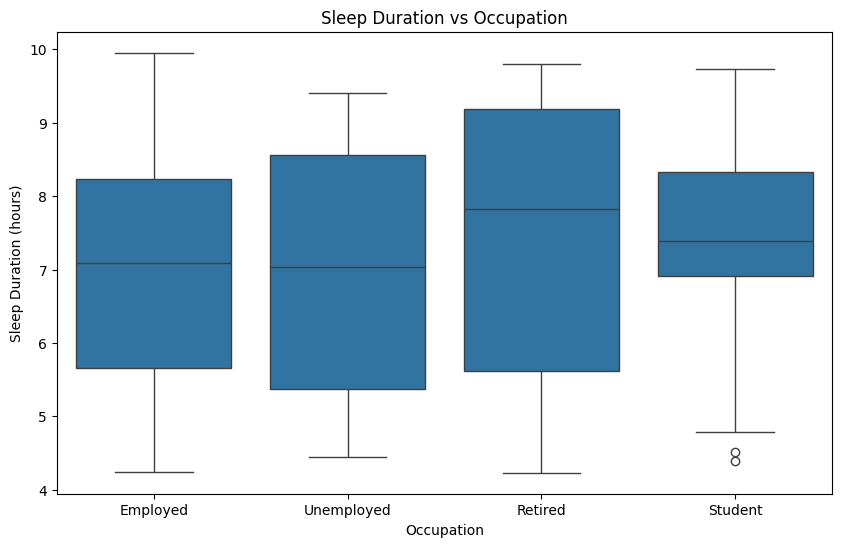

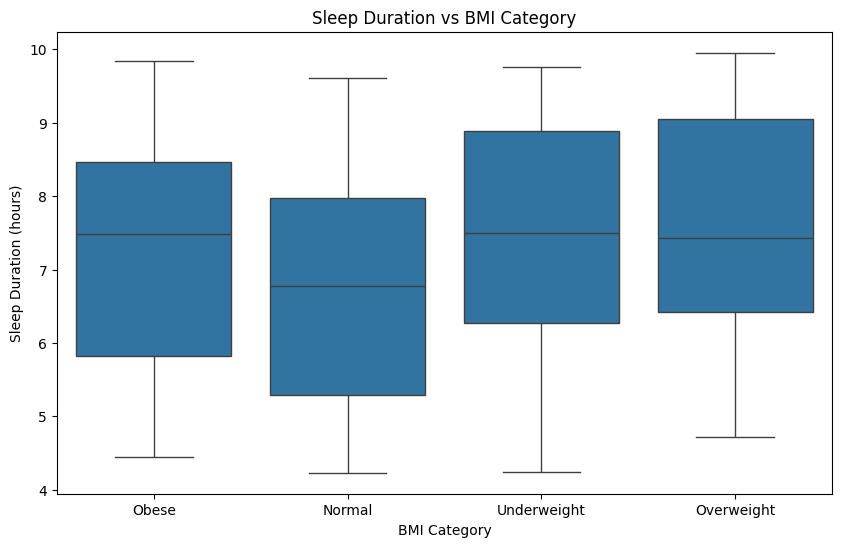

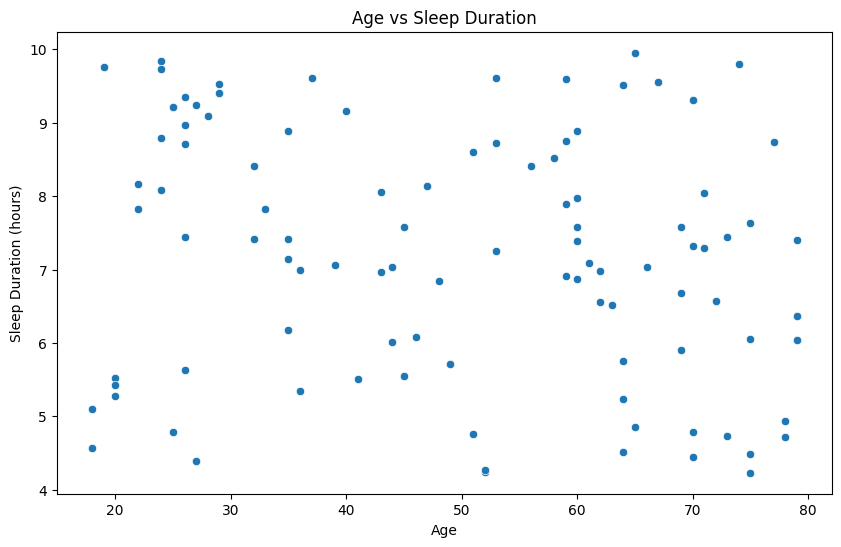

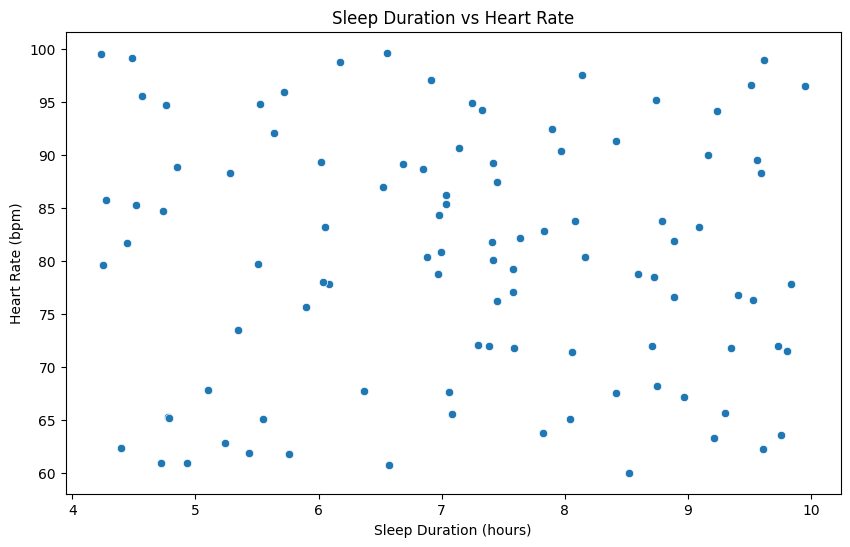

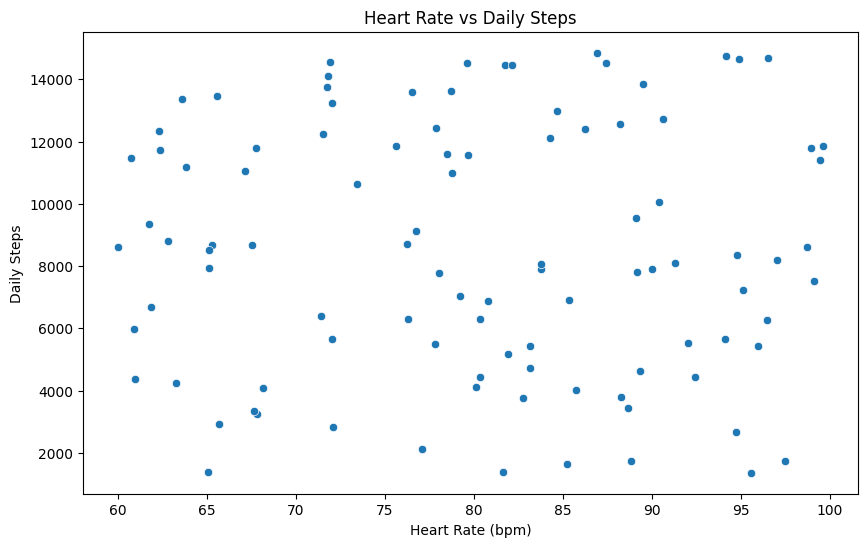

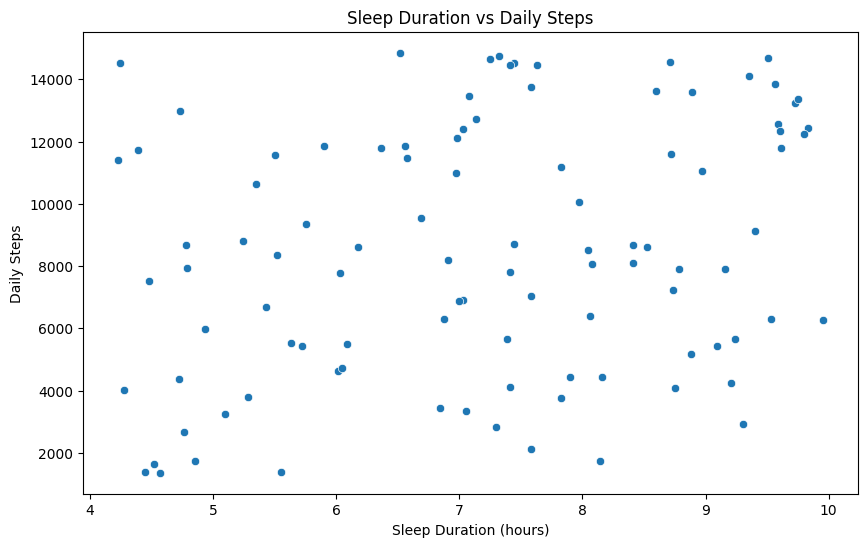

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset using pandas
file_path = '/mnt/data/sleep_health.csv'
if not os.path.exists(file_path):
    # Create a sample dataset if the file does not exist
    data_pandas = pd.DataFrame({
        'Person ID': np.arange(1, 101),
        'Gender': np.random.choice(['Male', 'Female'], size=100),
        'Age': np.random.randint(18, 80, size=100),
        'Occupation': np.random.choice(['Employed', 'Unemployed', 'Student', 'Retired'], size=100),
        'Sleep Duration': np.random.uniform(4, 10, size=100),
        'Quality of Sleep': np.random.randint(1, 5, size=100),
        'Physical Activity Level': np.random.choice(['Low', 'Medium', 'High'], size=100),
        'Stress Level': np.random.randint(1, 5, size=100),
        'BMI Category': np.random.choice(['Underweight', 'Normal', 'Overweight', 'Obese'], size=100),
        'Systolic blood pressure': np.random.uniform(110, 140, size=100),
        'Diastolic blood pressure': np.random.uniform(70, 90, size=100),
        'Heart Rate': np.random.uniform(60, 100, size=100),
        'Daily Steps': np.random.randint(1000, 15000, size=100),
        'Sleep Disorder': np.random.choice(['None', 'Mild', 'Moderate', 'Severe'], size=100)
    })
else:
    data_pandas = pd.read_csv(file_path)

# Step 1: Using pandas and seaborn/matplotlib to visualize distributions
# 1.1 Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_pandas['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 1.2 Sleep Duration Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_pandas['Sleep Duration'], kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# 1.3 Quality of Sleep Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Quality of Sleep', data=data_pandas)
plt.title('Distribution of Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Count')
plt.show()

# 1.4 Physical Activity Level Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Physical Activity Level', data=data_pandas)
plt.title('Distribution of Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.show()

# 1.5 Stress Level Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Stress Level', data=data_pandas)
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

# 1.6 Heart Rate Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_pandas['Heart Rate'], kde=True)
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

# Step 3: Using pandas to visualize Sleep Duration distributions based on other variables
# 3.1 Sleep Duration based on Quality of Sleep
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=data_pandas)
plt.title('Sleep Duration vs Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.2 Sleep Duration based on Stress Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress Level', y='Sleep Duration', data=data_pandas)
plt.title('Sleep Duration vs Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.3 Sleep Duration based on Physical Activity Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Physical Activity Level', y='Sleep Duration', data=data_pandas)
plt.title('Sleep Duration vs Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.4 Sleep Duration based on Occupation
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation', y='Sleep Duration', data=data_pandas)
plt.title('Sleep Duration vs Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.5 Sleep Duration based on BMI Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=data_pandas)
plt.title('Sleep Duration vs BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# Step 5: Using pandas to visualize relationships between variables
# 5.1 Age vs Sleep Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Sleep Duration', data=data_pandas)
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 5.2 Sleep Duration vs Heart Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep Duration', y='Heart Rate', data=data_pandas)
plt.title('Sleep Duration vs Heart Rate')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Heart Rate (bpm)')
plt.show()

# 5.3 Heart Rate vs Daily Steps
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Heart Rate', y='Daily Steps', data=data_pandas)
plt.title('Heart Rate vs Daily Steps')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Daily Steps')
plt.show()

# 5.4 Sleep Duration vs Daily Steps
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep Duration', y='Daily Steps', data=data_pandas)
plt.title('Sleep Duration vs Daily Steps')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Daily Steps')
plt.show()


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy

